# XYZ Loan EDA & FE & Model Build Project

## Part 1: Provide EDA (The distribution of Y by X) for the following variables.  
#### AP001, AP003, AP008
#### CR009, CR015, CR019
#### PA022, PA023, PA029
#### TD001, TD005, TD006, TD009, TD010, TD014


### 1.1 Data Preparation

In [1]:
import pandas as pd
df = pd.read_csv('XYZloan_default_selected_vars.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [2]:
df.shape

(80000, 89)

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 89 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  80000 non-null  int64  
 1   Unnamed: 0    80000 non-null  int64  
 2   id            80000 non-null  int64  
 3   loan_default  80000 non-null  int64  
 4   AP001         80000 non-null  int64  
 5   AP002         80000 non-null  int64  
 6   AP003         80000 non-null  int64  
 7   AP004         80000 non-null  int64  
 8   AP005         80000 non-null  object 
 9   AP006         80000 non-null  object 
 10  AP007         80000 non-null  int64  
 11  AP008         80000 non-null  int64  
 12  AP009         80000 non-null  int64  
 13  TD001         80000 non-null  int64  
 14  TD002         80000 non-null  int64  
 15  TD005         80000 non-null  int64  
 16  TD006         80000 non-null  int64  
 17  TD009         80000 non-null  int64  
 18  TD010         80000 non-nu

In [5]:
# List of features for binning
features = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

#### We don't want to do EDA and WOE transformation on test data, so I split the data as train and test sets

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# Check for special values such as -999, -99, 0, 'NA'
special_values = [-999, -99, 0, 'NA']

for feature in features:
    # Check if any special value is present in the feature
    has_special_value = any(value in special_values for value in train_df[feature])

    if has_special_value:
        print(f"Feature '{feature}' contains special values: {special_values}")

        # Optionally, you can also count the occurrences of each special value
        for value in special_values:
            count = sum(train_df[feature] == value)
            print(f"Count of {value}: {count}")
    else:
        print(f"No special values found in feature '{feature}'.")

No special values found in feature 'AP001'.
No special values found in feature 'AP003'.
No special values found in feature 'AP008'.
Feature 'CR009' contains special values: [-999, -99, 0, 'NA']
Count of -999: 0
Count of -99: 0
Count of 0: 10568
Count of NA: 0
No special values found in feature 'CR015'.
No special values found in feature 'CR019'.
Feature 'PA022' contains special values: [-999, -99, 0, 'NA']
Count of -999: 0
Count of -99: 1196
Count of 0: 125
Count of NA: 0
Feature 'PA023' contains special values: [-999, -99, 0, 'NA']
Count of -999: 0
Count of -99: 1196
Count of 0: 102
Count of NA: 0
Feature 'PA029' contains special values: [-999, -99, 0, 'NA']
Count of -999: 0
Count of -99: 1196
Count of 0: 193
Count of NA: 0
Feature 'TD001' contains special values: [-999, -99, 0, 'NA']
Count of -999: 0
Count of -99: 0
Count of 0: 15698
Count of NA: 0
Feature 'TD005' contains special values: [-999, -99, 0, 'NA']
Count of -999: 0
Count of -99: 0
Count of 0: 6157
Count of NA: 0
Feature 'T

### 1.2 EDA

In [9]:
def binning(train_df, var):
    # Handle special values
    special_values = [-99]
    train_df[var + '_bin'] = train_df[var].apply(lambda x: 'Special' if x in special_values else x)
    
    # Create bins for numerical values
    numerical_values = train_df[var].loc[~train_df[var].isin(special_values)]
    bins = pd.qcut(numerical_values, 10, duplicates='drop').astype(str)
    
    # Assign bins to numerical values
    train_df.loc[~train_df[var].isin(special_values), var + '_bin'] = bins.astype(str)
    
    # Fill missing values
    train_df[var + '_bin'].fillna("NoData", inplace=True)
    return train_df


# Apply binning for each feature in the training dataset
for feature in features:
    train_df = binning(train_df, feature)

# List of feature bins
features_bin = [f + '_bin' for f in features]

# Display the rows of the training dataset
features_bin

['AP001_bin',
 'AP003_bin',
 'AP008_bin',
 'CR009_bin',
 'CR015_bin',
 'CR019_bin',
 'PA022_bin',
 'PA023_bin',
 'PA029_bin',
 'TD001_bin',
 'TD005_bin',
 'TD006_bin',
 'TD009_bin',
 'TD010_bin',
 'TD014_bin']

In [10]:
# Display value counts for each bin of each feature
for feature_bin in features_bin:
    print(f"Value counts for {feature_bin}:")
    print(train_df[feature_bin].value_counts(dropna=False))

Value counts for AP001_bin:
(28.0, 30.0]      8414
(24.0, 26.0]      8316
(19.999, 24.0]    7660
(30.0, 32.0]      6665
(42.0, 56.0]      6353
(37.0, 42.0]      5858
(34.0, 37.0]      5792
(32.0, 34.0]      5157
(26.0, 27.0]      5081
(27.0, 28.0]      4704
Name: AP001_bin, dtype: int64
Value counts for AP003_bin:
(0.999, 3.0]    55129
(3.0, 4.0]       8672
(4.0, 6.0]        199
Name: AP003_bin, dtype: int64
Value counts for AP008_bin:
(0.999, 2.0]    24258
(2.0, 3.0]      14818
(4.0, 5.0]      13543
(3.0, 4.0]      11381
Name: AP008_bin, dtype: int64
Value counts for CR009_bin:
(-0.001, 2500.0]        13072
(33834.5, 50000.0]       6672
(17262.5, 24221.8]       6400
(24221.8, 33834.5]       6400
(11484.4, 17262.5]       6400
(82000.0, 1420300.0]     6393
(6800.0, 11484.4]        6358
(2500.0, 6800.0]         6170
(50000.0, 82000.0]       6135
Name: CR009_bin, dtype: int64
Value counts for CR015_bin:
(4.0, 5.0]      27500
(5.0, 6.0]      21562
(1.999, 3.0]     9068
(3.0, 4.0]       587

#### my target is loan_default, 0 should be no default, 1 means loan default, so my target is loan_default at 0.

In [94]:
train_df['target'] =np.where(train_df['loan_default']==0,1,0)

#### The following code outlines a way to perform exploratory data analysis (EDA) by plotting the distribution of the target variable (loan_default) by selected features. The plots show the distribution of loan_default as well as the mean of loan_default for each bin of the respective feature.

To answer the question comprehensively, I specifically analyze the relationships between each feature (X) and the target variable (Y) in terms of "When X is high or low, Y is high or low". This would involve providing insights based on the plots and describing how the target variable varies with each feature.

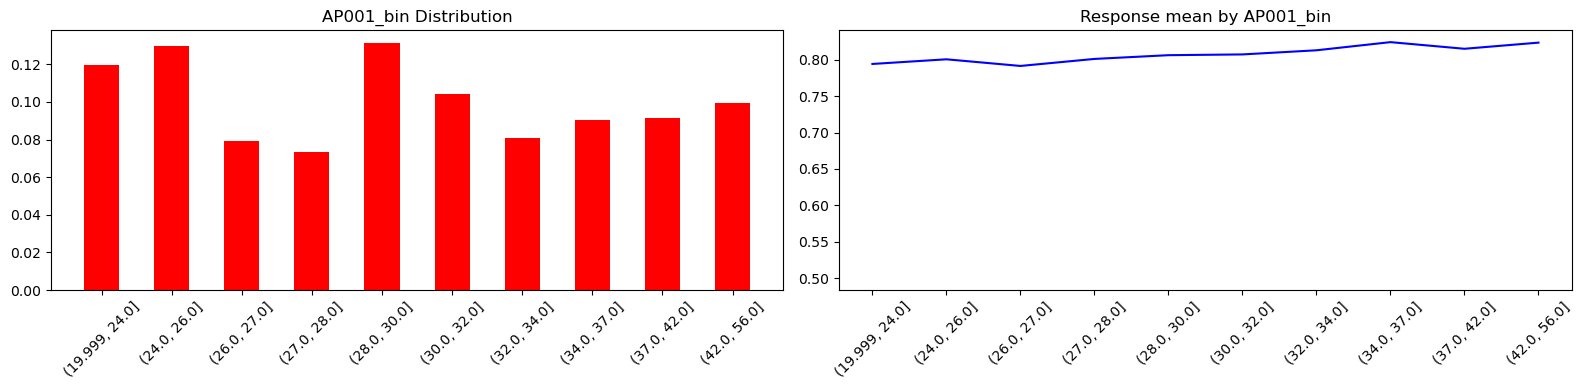

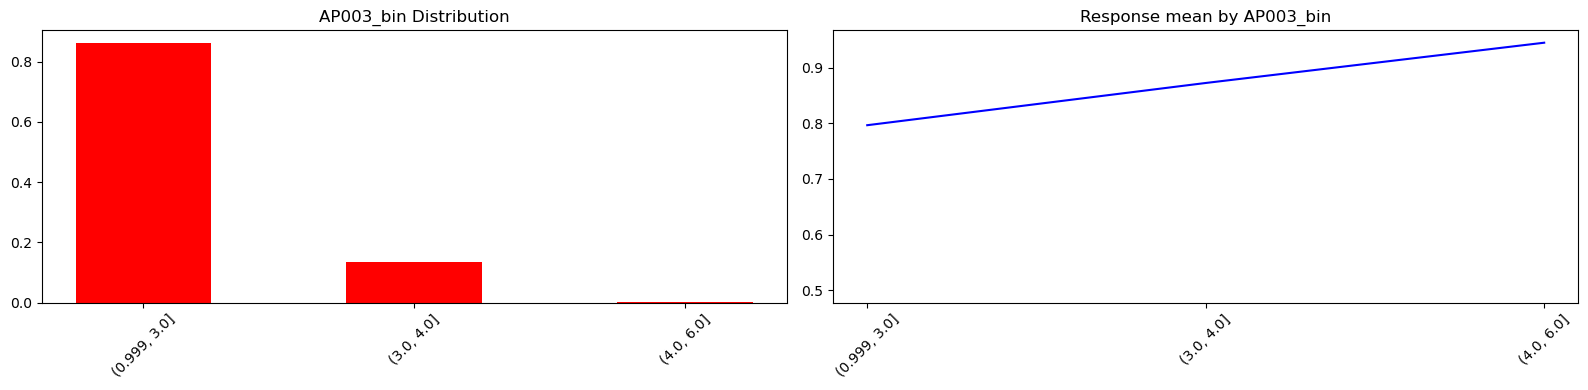

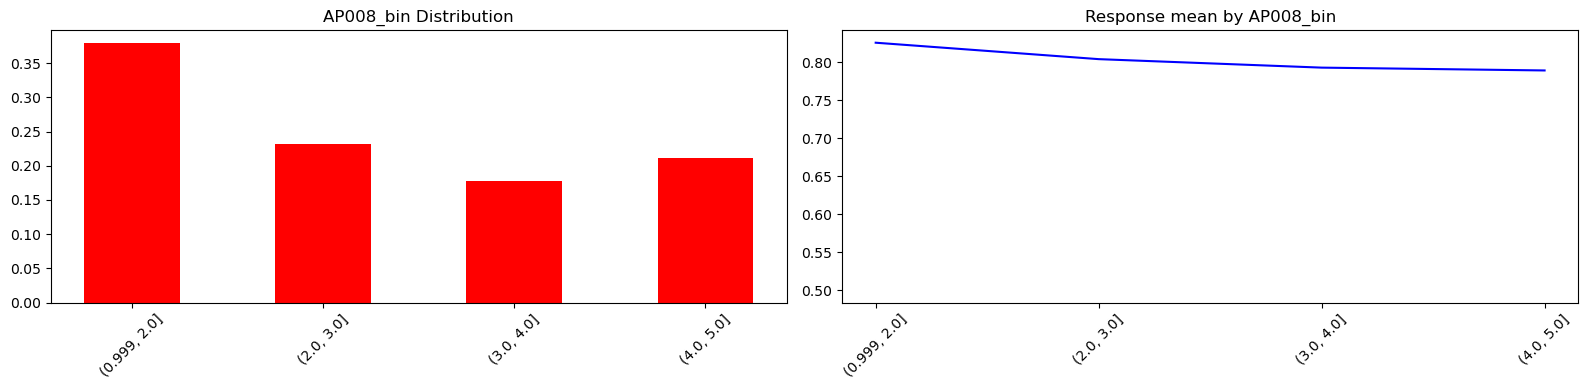

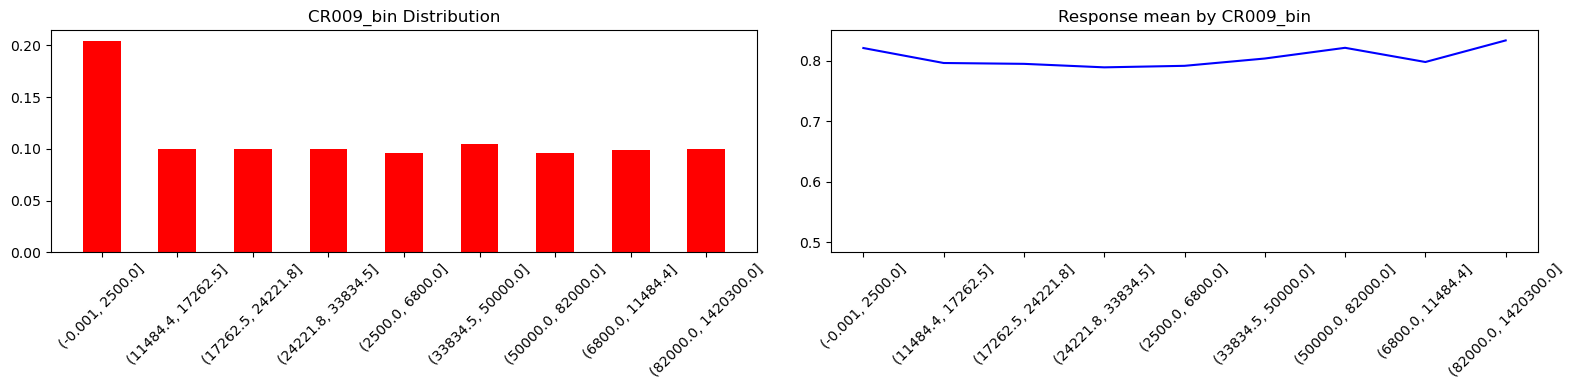

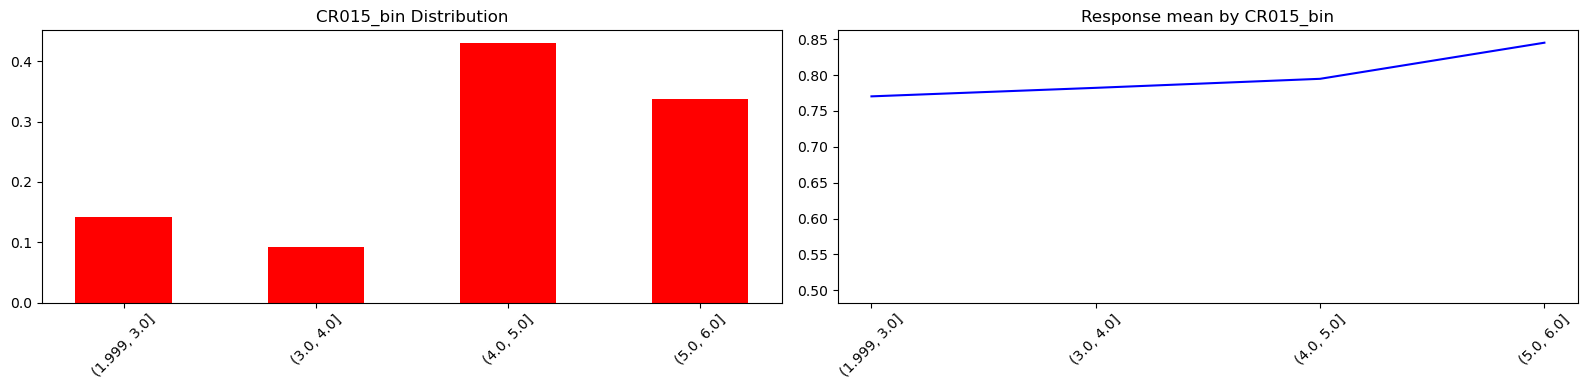

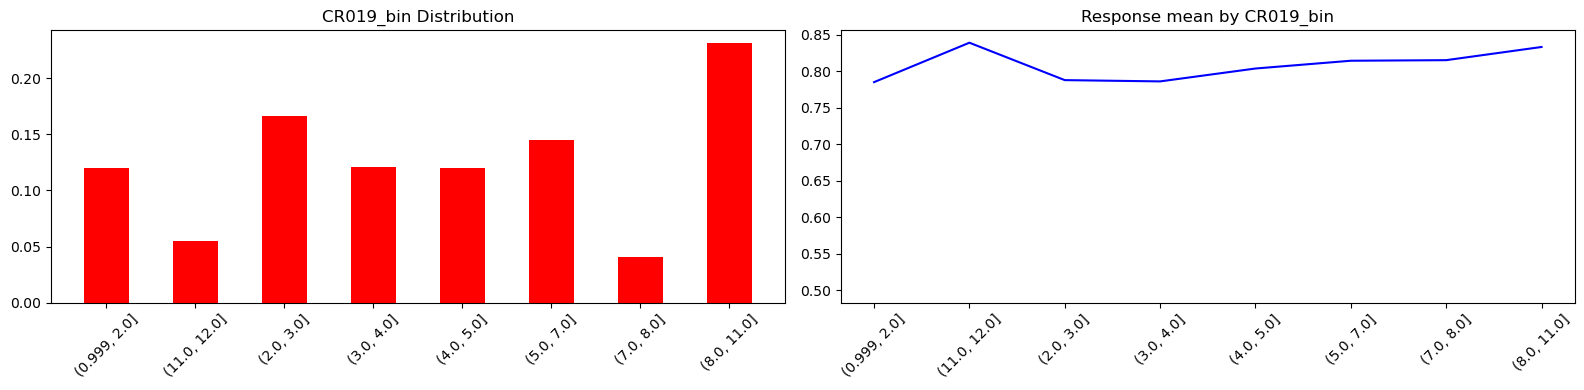

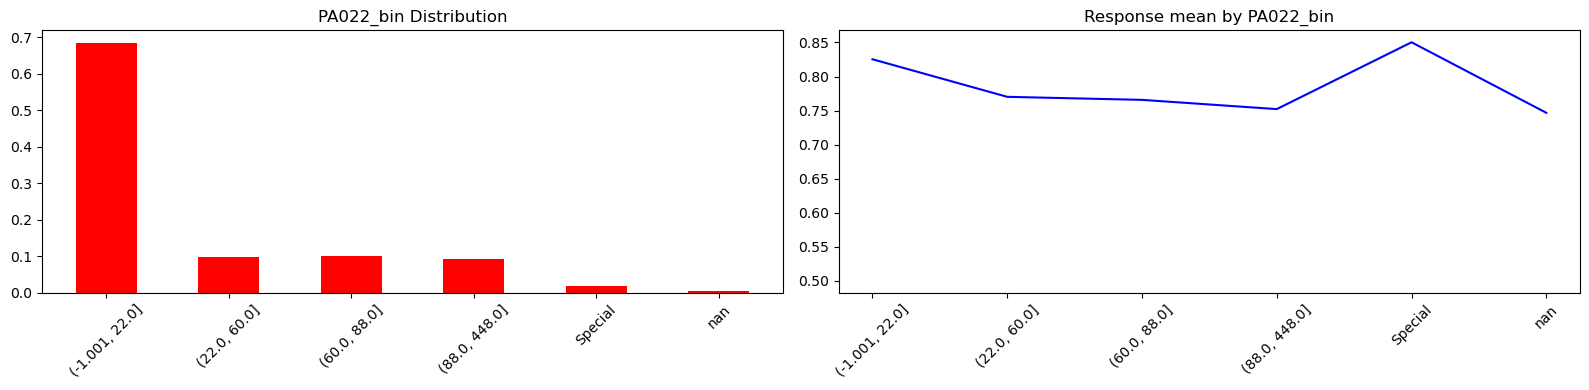

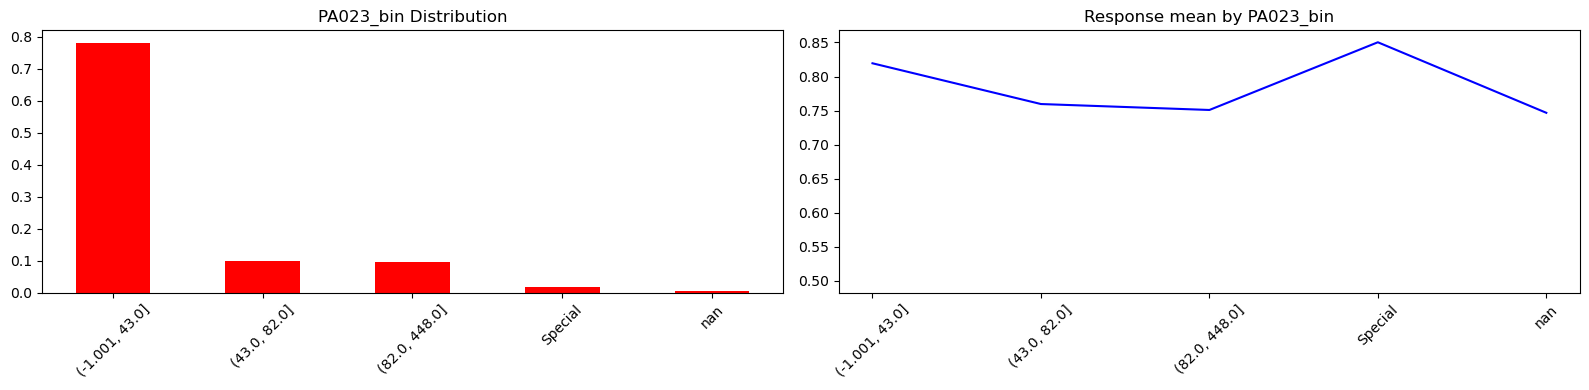

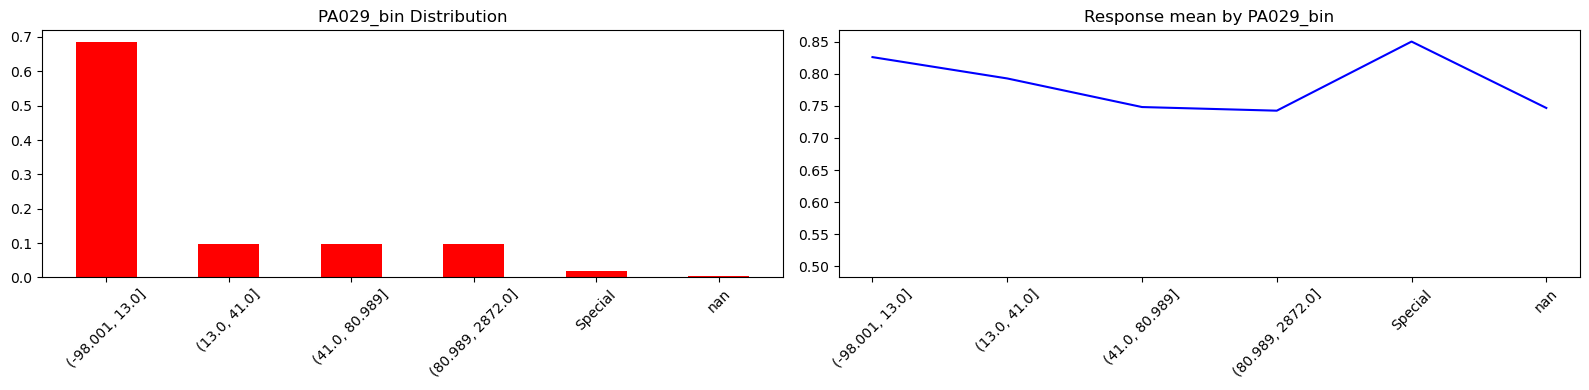

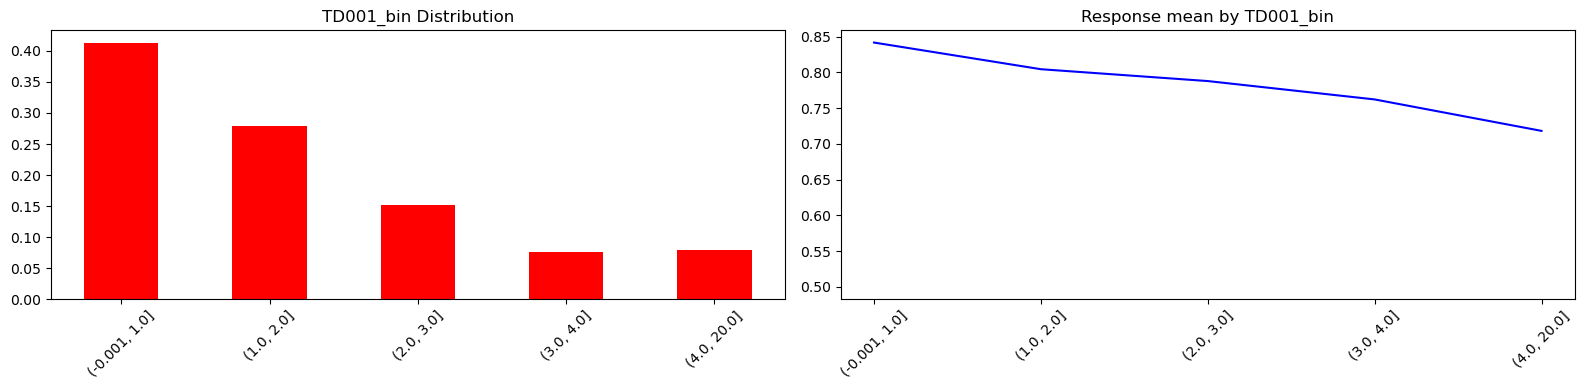

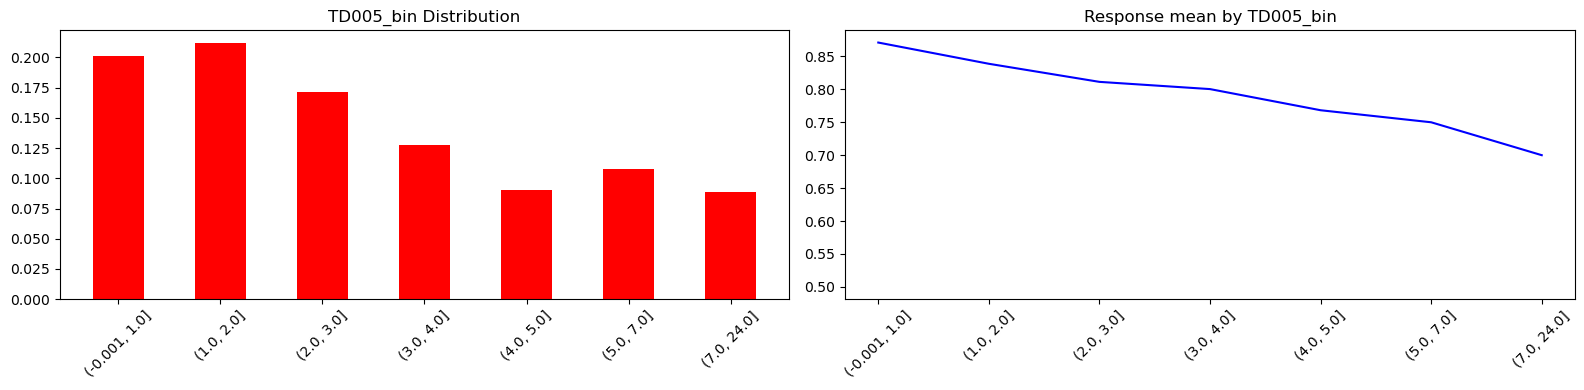

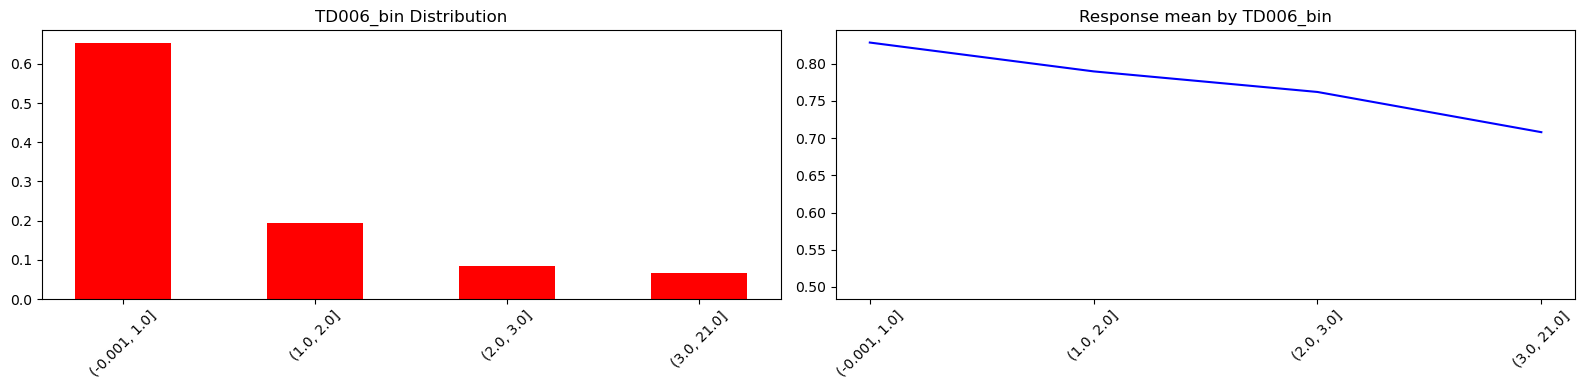

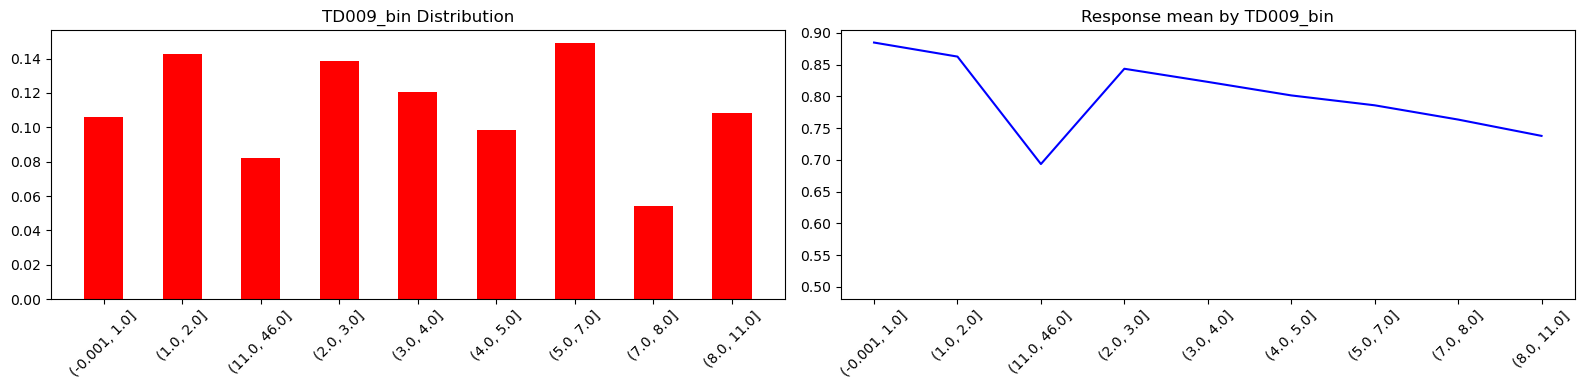

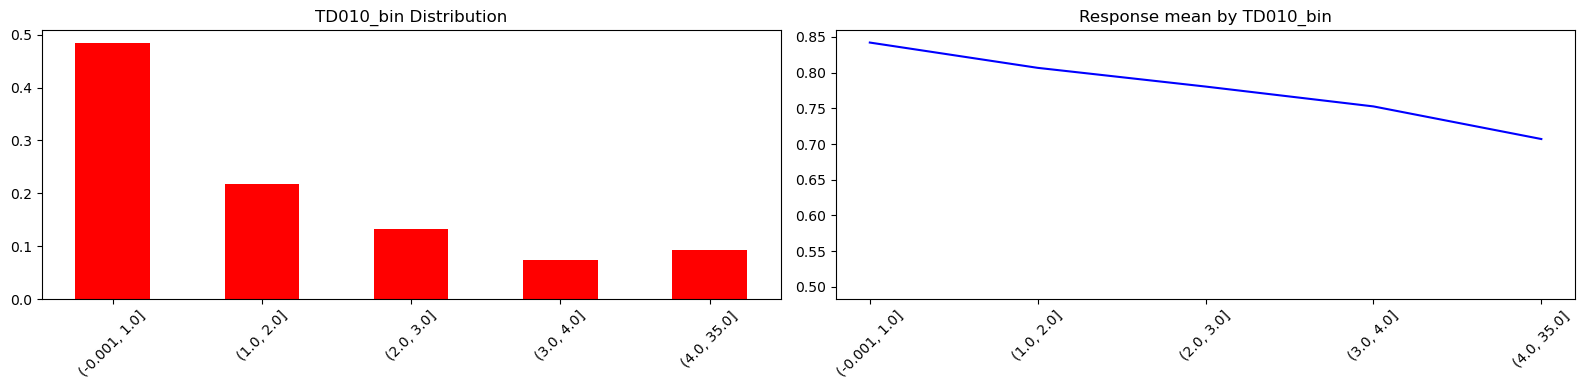

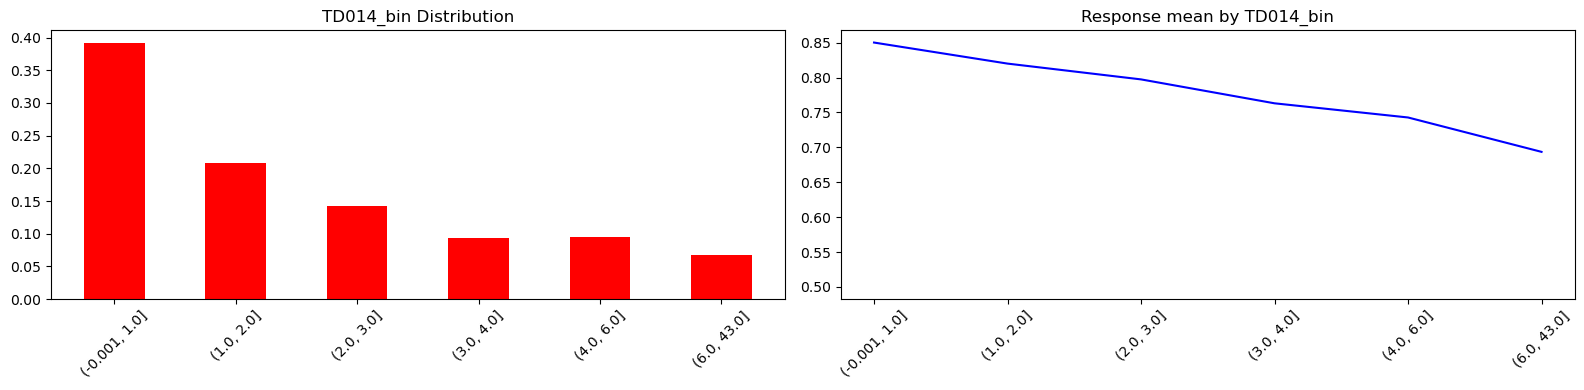

In [95]:
def plot_X_and_Y(train_df, var):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Use var for further analysis
    z_train = train_df.groupby(var)['target'].agg(['count', 'mean']).reset_index()
    z_train['count_pcnt'] = z_train['count'] / z_train['count'].sum()
    x = z_train[var]
    y_mean = z_train['mean']
    count_pcnt = z_train['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16, 4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    plt.title(var + ' Distribution')
    plt.xticks(ind, x.tolist(), rotation=45)

    plt.subplot(122)
    plt.plot(ind, y_mean, width, color='b')
    plt.xticks(ind, x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()

# Iterate over features_bin and plot
for i in features_bin:
    plot_X_and_Y(train_df, i)


### Business Content Interpretation Based on EDA

1. The plots show the mean of the target variable (loan_default) for each category of the respective feature.
2. AP001, AP003, AP008 are features related to applicant information.
3. AP001 (Age of the applicant): The plot shows how the mean of loan_default varies with the age of the applicant. The mean is high for certain age ranges like [20-26], [28-30], it suggests that applicants in these age ranges tend to default more often.
4. AP003 (level of education): This plot demonstrates how the mean of loan_default changes with the education level. Higher means for certain categories might indicate that applicants with higher education are less likely to default.
5. AP008 (ip city not applicant city): The plot showcases how the mean of loan_default is related to the location of the applicant. Higher means for specific city categories suggest that applicants with different location are more likely to default.
6. CR009, CR015, CR019 are features related to credit.
7. CR009, CR015, CR019: These features might be related to credit history, credit scores, or similar credit-related metrics. The plot for each would show how the mean of loan_default varies with these credit-related features. Higher means for certain categories could indicate a correlation between credit history/score and loan default.
9. PA022, PA023, PA029 are features related to call details.
10. PA022, PA023, PA029: These features could be related to the call frequency between applicants and loan collection. The plot would display how the mean of loan_default changes with different call frequency categories, providing insights into the impact of call details on loan default.
11. TD001, TD005, TD006, TD009, TD010, TD014 are features related to loan types.
12. TD001, TD005, TD006, TD009, TD010, TD014: These features likely pertain to loan types. The plot would reveal how the mean of loan_default is influenced by these loan type variables.

### Part 2 : Feature Engineering- Perform the weight-of-evidence (WOE) transformation for the selected variables 

#### In this dataset XYZloan_default_selected_vars.csv, the target variable “Target” has two values: “1” means a customer cannot repay the loan (loan default, or a bad loan), and “0” means a customer can repay the loan (a good loan). So I will perform WOE for binary target variable.

In [96]:
def WOE(var):
    train_df[var] = train_df[var].fillna('NoData')
    k = train_df[[var,'target']].groupby(var)['target'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Good']
    k['Bad'] = k['Count'] - k['Good']
    k['Good %'] = ((k['Good'] + 1) / (k['Good'].sum() + 1) * 100).round(2)  # Adding 1 to avoid divide by zero
    k['Bad %'] = ((k['Bad'] + 1) / (k['Bad'].sum() + 1) * 100).round(2)  # Adding 1 to avoid divide by zero
    k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %'])  # Remove .round(2) for precise values
    k = k.sort_values(by=var+'_WOE')
    return k
k = WOE('AP001')
k

,AP001,Count,Good,Bad,Good %,Bad %,AP001_WOE
1,21,508,373,135,0.72,1.10,-0.423814
36,56,19,15,4,0.03,0.04,-0.287682
0,20,86,68,18,0.13,0.15,-0.143101
2,22,1310,1032,278,2.00,2.26,-0.122218
7,27,5081,4021,1060,7.79,8.60,-0.098921
32,52,219,175,44,0.34,0.36,-0.057158
35,55,131,105,26,0.21,0.22,-0.046520
6,26,4378,3503,875,6.78,7.10,-0.046118
3,23,2330,1865,465,3.61,3.78,-0.046016
10,30,4358,3488,870,6.75,7.06,-0.044903


In [97]:
def WOE_all(features):
    woe_results = {}  # Dictionary to store WOE results for all features
    for var in features:
        train_df[var] = train_df[var].fillna('NoData')
        k = train_df[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
        k.columns = [var,'Count','Good']
        k['Bad'] = k['Count'] - k['Good']
        k['Good %'] = ((k['Good'] + 1) / (k['Good'].sum() + 1) * 100).round(2)
        k['Bad %'] = ((k['Bad'] + 1) / (k['Bad'].sum() + 1) * 100).round(2)
        k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %'])
        k = k.sort_values(by=var+'_WOE')
        woe_results[var] = k
    return woe_results

# Usage
woe_results_all = WOE_all(features)
woe_results_all

{'AP001':     AP001  Count  Good   Bad  Good %  Bad %  AP001_WOE
 33     53    224    31   193    0.26   0.38  -0.379490
 31     51    294    47   247    0.39   0.48  -0.207639
 34     54    220    37   183    0.31   0.36  -0.149532
 25     45    788   135   653    1.10   1.27  -0.143707
 28     48    530    90   440    0.74   0.85  -0.138586
 17     37   1530   264  1266    2.15   2.45  -0.130620
 16     36   1941   338  1603    2.75   3.10  -0.119801
 29     49    494    87   407    0.71   0.79  -0.106768
 19     39   1325   234  1091    1.90   2.11  -0.104834
 24     44    790   140   650    1.14   1.26  -0.100083
 26     46    749   133   616    1.09   1.19  -0.087776
 15     35   2321   417  1904    3.39   3.69  -0.084797
 21     41   1022   184   838    1.50   1.62  -0.076961
 23     43    916   167   749    1.36   1.45  -0.064079
 30     50    321    58   263    0.48   0.51  -0.060625
 18     38   1457   270  1187    2.20   2.30  -0.044452
 27     47    658   123   535    1.00  

#### Interpretation of WOE Transformation output
The provided Weight of Evidence (WOE) transformations for various features provide insights into the relationship between each feature and the target variable (`loan_default`). WOE is a valuable way to transform categorical or continuous features into a numeric representation that is well-suited for predictive modeling, especially in credit risk assessment.

Here is comprehensive interpretation of the WOE transformations for each feature and discuss their business implications:

1. **AP001 WOE Transformation:**
   - The WOE values indicate that as the applicant's age (AP001) increases, the likelihood of default decreases. Older applicants are less likely to default on loans, aligning with common financial intuition.

2. **AP003 WOE Transformation:**
   - The WOE values suggest that as the education level (AP003) increases, the likelihood of default decreases. This is logical, as more education may imply higher income and potential repayment.

3. **AP008 WOE Transformation:**
   - The WOE values suggest that different city (AP008) corresponds to a lower likelihood of default. Applicants with different city as their ip city are less likely to default on loans.

4. **CR009, CR015, CR019 WOE Transformations:**
   - The WOE for CR009 indicates that higher values are associated with a higher likelihood of being categorized as "Bad" customers.
   - The WOE for CR015 shows varying impacts on the likelihood of being categorized as "Bad" customers across these levels. 
   - The WOE for CR019 provides insights into the impact of different levels on the likelihood of being categorized as "Bad" customers. 

5. **PA022, PA023, PA029 WOE Transformations:**
   - The WOE values indicate that different days of call details(PA022, PA023, PA029) have varying impacts on the likelihood of default. For instance.

6. **TD001, TD005, TD006, TD009, TD010, TD014 WOE Transformations:**
   - The WOE values for credit-related features (TD001, TD005, TD006, TD009, TD010, TD014) suggest that higher transaction activity might be associated with a lower likelihood of default, although the relationship is not as strong.

These insights are crucial for risk assessment, product customization, and targeted marketing strategies within the lending industry. Lenders can use these insights to tailor their products, interest rates, and credit limits based on an applicant's characteristics, ultimately aiming to minimize defaults and maximize profits.

### Part 3 : Model Building

#### I will build a simple decision tree model with the above variables.

### 3.1 Data Preparation

In [120]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values_per = (df.isnull().sum() / df.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
Unnamed: 0.1,0,0.000000
Unnamed: 0,0,0.000000
id,0,0.000000
loan_default,0,0.000000
AP001,0,0.000000
...,...,...
CD170,381,0.004763
CD172,381,0.004763
CD173,381,0.004763
MB005,2793,0.034912


In [121]:
r = pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage']).reset_index()
r

,index,Count_of_Missing,Percentage
0,Unnamed: 0.1,0,0.000000
1,Unnamed: 0,0,0.000000
2,id,0,0.000000
3,loan_default,0,0.000000
4,AP001,0,0.000000
...,...,...,...
84,CD170,381,0.004763
85,CD172,381,0.004763
86,CD173,381,0.004763
87,MB005,2793,0.034912


In [122]:
def null_cell(df):
    dfx = df.copy()
    missing_values = dfx.isnull().sum()
    missing_values_per = dfx.isnull().sum() / dfx.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df)).index
fill_list

Index(['TD062', 'TD055', 'TD048', 'TD044', 'TD051', 'TD061', 'TD054', 'TD022',
       'TD023', 'TD024', 'MB005', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'CD108', 'PA031', 'CD101', 'CD100', 'CD088', 'CD072', 'CD071', 'CD018',
       'CD120', 'CD008', 'PA030', 'CD113', 'PA029', 'PA028', 'PA023', 'PA022',
       'CD118', 'CD117', 'CD115', 'CD121', 'CD114', 'CD106', 'CD107', 'CD160',
       'CD173', 'CD172', 'CD170', 'CD169', 'CD167', 'CD166', 'CD164', 'CD162',
       'CD153', 'CD123', 'CD152', 'CD137', 'CD136', 'CD135', 'CD133', 'CD132',
       'CD131', 'CD130'],
      dtype='object')

In [123]:
r.loc[r['index']=='type','Percentage']

Series([], Name: Percentage, dtype: float64)

In [124]:
df_mean = df 
df_mean = df.copy() 

In [125]:
for col in fill_list:
    df_mean.loc[:,col].fillna(df_mean.loc[:,col].mean(),inplace=True)

### 3.2 Build a simple decision tree model

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_mean[features],
                                                    df_mean['loan_default'], 
                                                    random_state=0)

In [127]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)

In [128]:
# Then, train the model.
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

### 3.3 Show the Importance of the "key questions" with the "variable importance"

In [129]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
12,TD009,0.381
1,AP003,0.220
4,CR015,0.098
8,PA029,0.058
10,TD005,0.057
6,PA022,0.046
14,TD014,0.028
7,PA023,0.026
9,TD001,0.025
13,TD010,0.016


<AxesSubplot:xlabel='feature'>

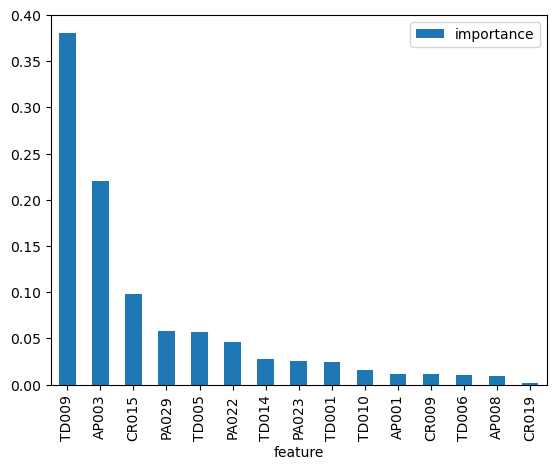

In [130]:
importances.plot.bar(x='feature')

#### Interpretation

Feature importance indicates the contribution of each feature towards a certain outcome or prediction. Higher scores imply a more significant impact on the outcome.


1. **TD009 (0.381)**:
   TD009 is the most important feature with the highest importance score (0.381), suggesting it has a significant influence on the target outcome. Businesses should pay close attention to this feature and its variations.

2. **AP003 (0.220)**:
   AP003 is the second most important feature with a substantial importance score (0.220). Understanding and utilizing AP003 effectively in modeling and strategies is crucial for achieving the desired outcomes.

3. **CR015 (0.098)**:
   CR015 is also important, but to a lesser extent compared to TD009 and AP003. It still holds notable importance (0.098) and should be considered in the decision-making process.

4. **PA029 (0.058)**:
   PA029 holds moderate importance with a score of 0.058. Businesses should include it in their analytical processes and strategies.

5. **TD005 (0.057)**:
   TD005 closely follows PA029 in importance (0.057). It should be carefully considered in predictive modeling and strategic planning.

6. **PA022 (0.046)**:
   PA022 has a moderate importance score (0.046), suggesting it should be factored into analysis and decision-making processes.

7. **TD014 (0.028)**:
   TD014 has a lower importance compared to the above features but is still non-negligible (0.028). It should be considered for a comprehensive analysis.

8. **PA023 (0.026)**:
   PA023 has a minor importance score (0.026) but should still be taken into account when developing strategies.

9. **TD001 (0.025)**:
   TD001 has a similar level of importance as PA023 (0.025). Understanding its role is essential for effective decision-making.

10. **TD010 (0.016)**:
    TD010, while less important compared to the others, still has a relevant importance score (0.016). It should be incorporated into analysis and strategies.

11. **AP001 (0.012)**:
    AP001 has a relatively low importance score (0.012), implying a lesser impact on the target outcome. However, it should still be considered in the analysis.

12. **CR009 (0.011)**:
    CR009 has a similar level of importance as AP001 (0.011). Although it's not highly impactful, it should not be ignored in the analysis.

13. **TD006 (0.010)**:
    TD006 has a minor importance score (0.010) and should be considered, albeit with lower priority.

14. **AP008 (0.009)**:
    AP008 has a low importance score (0.009). While it doesn't significantly influence the outcome, it should still be factored into the analysis.

15. **CR019 (0.002)**:
    CR019 has the lowest importance score (0.002), indicating a minimal impact on the outcome. It may not be a primary focus in the analysis, but its influence should not be entirely disregarded.

In summary, businesses should prioritize features based on their importance scores when developing models, designing strategies, and making data-driven decisions. Understanding the impact of each feature is crucial for optimizing business processes and achieving desired outcomes.

### 3.4 Predict new observations

In [131]:
#predict the class labels for the first 10 instances in the test dataset (X_test) using the trained decision tree classifier (dtree).
predictions = dtree.predict(X_test[0:10])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
#predict the probabilities for each class (0 and 1) for the first 10 instances in the test dataset using the trained decision tree classifier.
dtree.predict_proba(X_test[0:10])

array([[0.85008237, 0.14991763],
       [0.78895899, 0.21104101],
       [0.84810974, 0.15189026],
       [0.88971763, 0.11028237],
       [0.73535273, 0.26464727],
       [0.88107639, 0.11892361],
       [0.88107639, 0.11892361],
       [0.55514706, 0.44485294],
       [0.84937817, 0.15062183],
       [0.63362069, 0.36637931]])

In [133]:
y_pred = dtree.predict_proba(X_test[0:10])[:,1]
y_pred
#The resulting y_pred array contains the predicted probabilities of each instance belonging to class 1.

array([0.14991763, 0.21104101, 0.15189026, 0.11028237, 0.26464727,
       0.11892361, 0.11892361, 0.44485294, 0.15062183, 0.36637931])

### Part 4:  Evaluate a classification decision tree model using the standard ROC and the gains table and lift to show model improvement

### 4.1 The standard ROC

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.6349730344187184

#### the code calculates the ROC AUC score, which provides an assessment of how well the decision tree classifier is able to distinguish between the two classes (positive and negative) based on the specified features and the predicted probabilities for class 1. An ROC AUC score of approximately 0.635 suggests a fair ability of the classifier to discriminate between the classes.

In [135]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 1.84899846e-04, 2.46533128e-04, 3.69799692e-04,
        2.65023112e-03, 3.20493066e-03, 3.63636364e-03, 5.42372881e-03,
        1.19568567e-02, 1.64560863e-02, 1.78120185e-02, 2.26194145e-02,
        2.37288136e-02, 2.74884438e-02, 3.46995378e-02, 5.25731895e-02,
        5.78736518e-02, 8.35130971e-02, 9.22650231e-02, 9.42372881e-02,
        1.03975347e-01, 1.22033898e-01, 1.40770416e-01, 1.45084746e-01,
        1.53158706e-01, 1.58952234e-01, 1.96055470e-01, 2.08443760e-01,
        2.08813559e-01, 2.33158706e-01, 2.45485362e-01, 2.48690293e-01,
        2.58181818e-01, 2.65392912e-01, 2.78582435e-01, 3.25053929e-01,
        3.76887519e-01, 4.01171032e-01, 4.11402157e-01, 4.60092450e-01,
        4.63235747e-01, 4.68166410e-01, 4.88258860e-01, 4.89429892e-01,
        4.94175655e-01, 4.94298921e-01, 6.00554700e-01, 6.24406780e-01,
        6.61510015e-01, 6.72295840e-01, 6.72480740e-01, 6.89306626e-01,
        7.51309707e-01, 7.57473035e-01, 7.60554700e-01, 8.016024

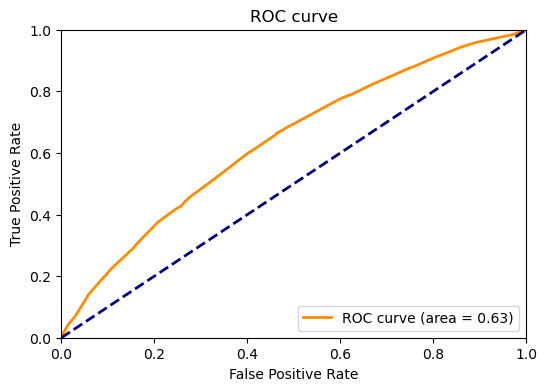

In [136]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

#### Interpretation
FPR and TPR are crucial for evaluating the performance of a classification model, particularly in imbalanced datasets. The ROC curve is a visual representation of the trade-off between TPR and FPR, and the area under the provides a single metric to evaluate the model's ability to distinguish between the classes. A higher ROC score indicates better performance.

### 4.2 The gains table

In [137]:
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = Y_test
df_prep['pred'] =y_pred
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
72350,1,1.0,0
66224,0,1.0,1
60696,1,1.0,2
32136,0,1.0,3
49988,0,1.0,4


In [138]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
8    2000
9    2000
Name: decile, dtype: int64

In [139]:
#Grouping by Decile and Calculating Counts of Actual Outcomes
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
# Create gains table
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,2000,684
1,2000,526
2,2000,466
3,2000,419
4,2000,405
5,2000,340
6,2000,270
7,2000,269
8,2000,232


In [140]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,2000,684,1316,2000,684,1316,0.18,0.08,377.5,1.81,10.0,34.20
1,2000,526,1474,4000,1210,2790,0.32,0.17,755.0,1.60,15.0,30.25
2,2000,466,1534,6000,1676,4324,0.44,0.27,1132.5,1.48,17.0,27.93
3,2000,419,1581,8000,2095,5905,0.55,0.36,1510.0,1.39,19.0,26.19
4,2000,405,1595,10000,2500,7500,0.66,0.46,1887.5,1.32,20.0,25.00
5,2000,340,1660,12000,2840,9160,0.75,0.56,2265.0,1.25,19.0,23.67
6,2000,270,1730,14000,3110,10890,0.82,0.67,2642.5,1.18,15.0,22.21
7,2000,269,1731,16000,3379,12621,0.90,0.78,3020.0,1.12,12.0,21.12
8,2000,232,1768,18000,3611,14389,0.96,0.89,3397.5,1.06,7.0,20.06


### Interpretation:

The "lift" metric indicates how many times better the model performs compared to random chance. A lift of 1.81 in the first decile means the model's performance is approximately 1.81 times better than random chance in identifying positive outcomes.

The "K_S" statistic measures the maximum vertical separation between the cumulative distribution of actual positive outcomes and actual negative outcomes. A higher K_S value indicates better model performance in distinguishing between positive and negative outcomes.

The "gain" shows the percentage of actual positive outcomes captured in each decile. The higher the gain, the more efficient the model is at capturing positive outcomes within that decile.

<AxesSubplot:ylabel='actual'>

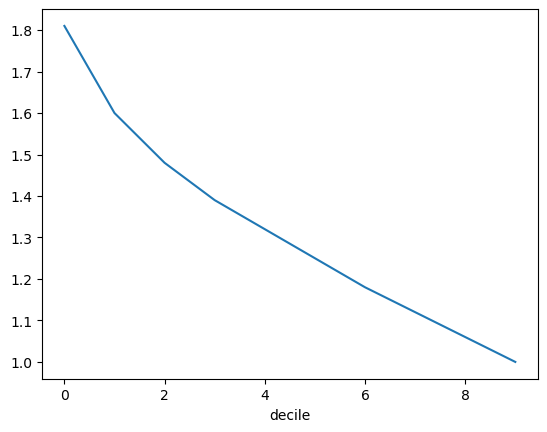

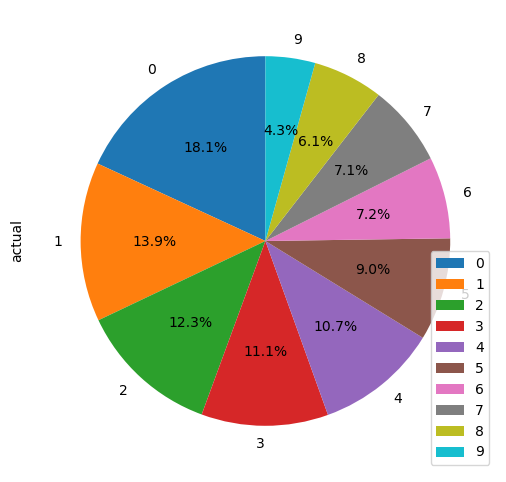

In [141]:
# Vlisualization
def gains_table(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = Y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(Y_test,y_pred)
gains
gains['lift'].plot.line()
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

#### Interpretation:

Lift Plot

The lift plot shows how many times better the model performs compared to random chance in identifying positive outcomes for each decile. The model has a better performance in first few deciles.

Pie Chart

The pie chart illustrates the distribution of actual positives across the deciles, giving an overview of the model's performance in capturing positive outcomes in different segments.

#### Overall, these visualizations and metrics provide insights into how well the model is performing in terms of identifying positive outcomes across different segments (deciles) based on predicted probabilities.